In [104]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics

In [105]:
#Read in data from a local csv,
#Tesla = pd.read_csv("TeslaFi92022B.csv")
#df = pd.DataFrame(Tesla)
#print(df)

In [106]:
#Read in data from a local csv - FULL DATASET
Tesla = pd.read_csv("TeslaFi92022 (updates for project).csv")
df = pd.DataFrame(Tesla)
print(df)

      data_id       Date   event_time    state  time_to_full_charge  \
0      747942   9/1/2022  12:00:00 AM   asleep                  NaN   
1      747943   9/1/2022  12:01:00 AM   asleep                  NaN   
2      747944   9/1/2022  12:02:00 AM   asleep                  NaN   
3      747945   9/1/2022  12:03:00 AM   asleep                  NaN   
4      747946   9/1/2022  12:04:00 AM   asleep                  NaN   
...       ...        ...          ...      ...                  ...   
45137  793079  9/30/2022  11:56:00 PM  offline                  NaN   
45138  793080  9/30/2022  11:57:00 PM  offline                  NaN   
45139  793081  9/30/2022  11:58:00 PM  offline                  NaN   
45140  793082  9/30/2022  11:59:00 PM  offline                  NaN   
45141   Total        NaN          NaN      NaN                  NaN   

       charge_current_request  charge_to_max_range  battery_range  \
0                         NaN                  NaN            NaN   
1        

C:\Users\bmontgomery\AppData\Local\Temp\ipykernel_11764\2271429469.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Tesla = pd.read_csv("TeslaFi92022 (updates for project).csv")


In [107]:
df.shape

(45142, 31)

In [108]:
#Cleaning data to show only rows when the vehicle state is online
df[Tesla["state"] == "online"]

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
455,748397,9/1/2022,7:35:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,1789.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
456,748398,9/1/2022,7:36:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
457,748399,9/1/2022,7:36:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
458,748400,9/1/2022,7:37:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
459,748401,9/1/2022,7:37:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44925,792867,9/30/2022,8:24:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,7.0,0.0,0.0,226.94
44926,792868,9/30/2022,8:25:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,8.0,0.0,0.0,226.94
44927,792869,9/30/2022,8:26:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,226.94
44928,792870,9/30/2022,8:27:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,10.0,0.0,0.0,226.94


In [109]:
df[(Tesla["state"] == "online") & (Tesla["time_to_full_charge"] != False)]

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
462,748404,9/1/2022,7:39:00 AM,online,6.25,24.0,0.0,42.06,84.0,24.0,...,0.0,4618.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
463,748405,9/1/2022,7:40:00 AM,online,5.58,24.0,0.0,42.53,84.0,24.0,...,0.5,4618.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
464,748406,9/1/2022,7:41:00 AM,online,5.58,24.0,0.0,43.49,84.0,24.0,...,1.5,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
465,748407,9/1/2022,7:42:00 AM,online,5.58,24.0,0.0,43.49,84.0,24.0,...,1.5,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
466,748408,9/1/2022,7:43:00 AM,online,5.50,24.0,0.0,43.97,84.0,24.0,...,2.0,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,792835,9/30/2022,7:52:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44894,792836,9/30/2022,7:53:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44895,792837,9/30/2022,7:54:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44896,792838,9/30/2022,7:55:00 PM,online,0.08,15.0,0.0,190.45,87.0,15.0,...,2.0,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94


In [110]:
df[(Tesla["charger_actual_current"] != False)]

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
0,747942,9/1/2022,12:00:00 AM,asleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1789.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
1,747943,9/1/2022,12:01:00 AM,asleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1789.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
2,747944,9/1/2022,12:02:00 AM,asleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1789.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
3,747945,9/1/2022,12:03:00 AM,asleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1789.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
4,747946,9/1/2022,12:04:00 AM,asleep,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1789.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45137,793079,9/30/2022,11:56:00 PM,offline,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
45138,793080,9/30/2022,11:57:00 PM,offline,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
45139,793081,9/30/2022,11:58:00 PM,offline,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94
45140,793082,9/30/2022,11:59:00 PM,offline,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,226.94


In [111]:
clean_Tesla = Tesla.dropna()
Tesla.dropna()

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
840,748782,9/1/2022,1:57:00 PM,online,0.0,24.0,0.0,190.67,84.0,0.0,...,148.5,4619.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
5075,753017,9/4/2022,12:35:00 PM,online,0.0,24.0,0.0,188.29,84.0,0.0,...,146.0,4626.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
7764,755706,9/6/2022,8:09:00 AM,online,0.0,24.0,0.0,112.30,84.0,0.0,...,146.0,4631.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
9181,757123,9/7/2022,6:37:00 AM,online,0.0,24.0,0.0,190.17,84.0,0.0,...,156.0,4635.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
9344,757286,9/7/2022,8:22:00 AM,online,0.0,24.0,0.0,116.11,84.0,0.0,...,156.0,4636.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
10023,757965,9/7/2022,6:24:00 PM,online,0.0,32.0,0.0,37.74,84.0,0.0,...,156.0,4638.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
18267,766209,9/13/2022,8:48:00 AM,online,0.0,32.0,0.0,113.72,84.0,0.0,...,163.5,4665.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
19833,767775,9/14/2022,8:24:00 AM,online,0.0,32.0,0.0,121.43,87.0,0.0,...,174.5,4676.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
27195,775137,9/19/2022,8:19:00 AM,online,0.0,32.0,0.0,118.53,87.0,0.0,...,2.0,4713.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
28771,776713,9/20/2022,8:06:00 AM,online,0.0,32.0,0.0,122.81,87.0,0.0,...,147.0,4718.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94


In [112]:
#Use of Python statistics to find the most common State of Charge Limit.  This let's us see the most commonly requested amount of charge in September.
statistics.mode(Tesla.charge_limit_soc)

87.0

In [113]:
#Using Numpy to see how many miles were added in the month of September.
np.sum(clean_Tesla.charge_miles_added_rated)

3046.5

In [114]:
#Numpy telling us the median mileage added per charging session is 91mi
np.median(clean_Tesla.charge_miles_added_rated)

91.0

In [115]:
#Numpy to tell us the average battery range, per charging session in September.
#np.mean(Tesla.battery_range)

In [116]:
np.mean(Tesla.charge_limit_soc)

85.8915670606881

In [117]:
#unique, counts = np.unique(clean_Tesla, return_counts=True)
#print(np.asarray((unique, counts)).T)

#unique, counts = np.unique(clean_Tesla.Date)
#print(np.asarray((unique, counts)).T)

In [171]:
 total_days = clean_Tesla["Date"].unique().T
len(total_days)


15

In [119]:
#DELETE?
#pd.value_counts(clean_Tesla["Date"].values)

9/23/2022    8
9/7/2022     3
9/22/2022    3
9/21/2022    2
9/1/2022     1
9/4/2022     1
9/6/2022     1
9/13/2022    1
9/14/2022    1
9/19/2022    1
9/20/2022    1
9/24/2022    1
9/26/2022    1
9/28/2022    1
9/29/2022    1
dtype: int64

In [120]:
#NOTES FROM STUDY SESSION
#( ) Get equations working
#( ) Get charts working
#( ) Second chart
#( ) Number 5 (Readme and Markdown)

In [121]:
#rng = np.random.RandomState(55)
#ser = pd.Series(rng.randint(0, 10, 6))
#ser
#df - halfrow

In [122]:
#df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
#df

IndentationError: unexpected indent (3680383612.py, line 2)

In [ ]:
#np.exp(ser)

In [ ]:
#np.sin(df * np.pi / 9)

In [ ]:
#A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
#A

In [ ]:
#B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
#B

In [ ]:
#A + B

In [ ]:
#fill = A.stack().mean()
#A.add(B, fill_value=fill)

In [ ]:
#big_array = np.random.randint(1, 100, size=1000000)
#%timeit compute_reciprocals(big_array)

In [ ]:
#for i=1:3
#fprint('%i\n',i)

<AxesSubplot: xlabel='Date', ylabel='battery_range'>

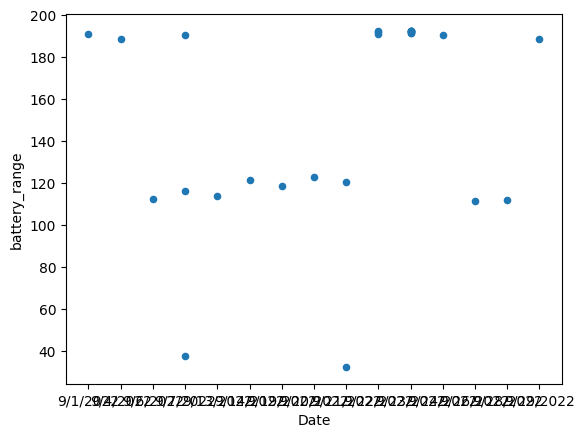

In [167]:
clean_Tesla.plot(x="Date", y="battery_range", kind="scatter") 

<AxesSubplot: xlabel='battery_range'>

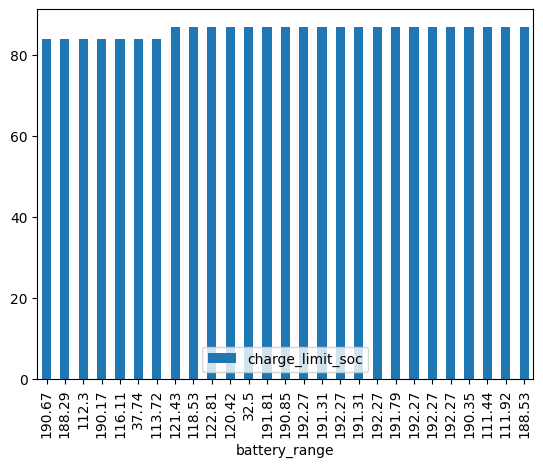

In [166]:
clean_Tesla.plot(x="battery_range", y="charge_limit_soc", kind="bar")
